# **Logistic Regression**: HR Dataset 🕵️‍♀️

This is the dataset of a large company, which has around 4000 employees. Every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. This level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:
* the former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* a sizeable department has to be maintained, for the purposes of recruiting new talent
* more often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, it is important to understand what factors cause attrition. In other words, it is important to undersand what needs to be changed in order to get most of the employees to stay. Therefore, the goal of the study is to model the probability of attrition based on certain features.

# **Logistic Regression with Scikit-Learn**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Data Preparation </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.1.</b> FULL-set of features </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.2.</b> Reduced-set of features </span><br>
$\qquad$ <span style="color:gray"><b>4.</b> Logistic Regression with Scikit-Learn </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.1.</b> FULL-set of features </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.2.</b> Reduced-set of features </span><br>

## **0.** Settings

In [22]:
# Libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import scikitplot.metrics as splt
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd  

%matplotlib inline

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |--------------------------|------------|-------------------------------------------------------------------------------|
    | Name                     | Data Type  | Description                                                                   |
    |--------------------------|------------|-------------------------------------------------------------------------------|
    | Age                      | continuous | Age of the employee                                                           |
    | Attrition                | nominal    | Whether the employee left in the previous year or not                         |
    | BusinessTravel           | nominal    | How frequently the employees travelled for business purposes in the last year |
    | Department               | nominal    | Department in company                                                         |
    | DistanceFromHome         | continuous | Distance from home in kms                                                     |
    | Education                | continuous | Education Level                                                               |
    | EducationField           | nominal    | Field of education                                                            |
    | EmployeeCount            | continuous | Employee count                                                                |
    | EmployeeID               | nominal    | Employee number/id                                                            |
    | Gender                   | nominal    | Gender of employee                                                            |
    | JobLevel                 | continuous | Job level at company on a scale of 1 to 5                                     |
    | JobRole                  | nominal    | Name of job role in company                                                   |
    | MaritalStatus            | nominal    | Marital status of the employee                                                |
    | MonthlyIncome            | continuous | Monthly income in rupees per month                                            |
    | NumCompaniesWorked       | continuous | Total number of companies the employee has worked for                         |
    | Over18                   | nominal    | Whether the employee is above 18 years of age or not                          |
    | PercentSalaryHike        | continuous | Percent salary hike for last year                                             |
    | PerformanceRating	       | continuous | Performance rating for last year                                              |
    | RelationshipSatisfaction | continuous | Relationship satisfaction level                                               |
    | StandardHours            | continuous | Standard hours of work for the employee                                       |
    | StockOptionLevel         | continuous | Stock option level of the employee                                            |
    | TotalWorkingYears        | continuous | Total number of years the employee has worked so far                          |
    | TrainingTimesLastYear    | continuous | Number of times training was conducted for this employee last year            |
    | WorkLifeBalance          | continuous | Work life balance level                                                       |
    | YearsAtCompany           | continuous | Total number of years spent at the company by the employee                    |
    | YearsSinceLastPromotion  | continuous | Number of years since last promotion                                          |
    | YearsWithCurrManager     | continuous | Number of years under current manager                                         |
    |--------------------------|------------|-------------------------------------------------------------------------------|

'''

In [2]:
# Import the dataset
data = pd.read_csv('./dataset.csv')
data.head().T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,Female,Female,Male,Male,Male


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## **2.** Data Preprocessing

In [5]:
# Null elements
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [7]:
data.shape

(4410, 24)

In [8]:
# We can either fill the nulls with 0 or delete the rows. 
# In this case we can try to delete the rows with missing 
# elements since we have quite a lot of data.

# Fill
# data.fillna(0, inplace =True)

# Drop
data = data.dropna(how='any', axis=0)
data.shape

(4382, 24)

In [9]:
# We remove unnecessary information
data.drop(['EmployeeCount','EmployeeID','StandardHours', 'Over18'], axis=1, inplace=True)

#   * 'EmployeeCount' is always equal to 1 (as employees are interviewed one at a time)
#   * 'EmployeeID' are unique values 
#   * 'StandardHours' is (basically) always 8
#   * 'Over18' because all the employees are >18

data.shape

(4382, 20)

## **3.** Data Preparation

From previous analyses (EDA) we certainly want to take into account (since they were visually influential):

* Business Travel
* Department
* Education Field
* Marital Status

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
data.iloc[0]

Age                                               51
Attrition                                         No
BusinessTravel                         Travel_Rarely
Department                                     Sales
DistanceFromHome                                   6
Education                                          2
EducationField                         Life Sciences
Gender                                        Female
JobLevel                                           1
JobRole                    Healthcare Representative
MaritalStatus                                Married
MonthlyIncome                                 131160
NumCompaniesWorked                               1.0
PercentSalaryHike                                 11
StockOptionLevel                                   0
TotalWorkingYears                                1.0
TrainingTimesLastYear                              6
YearsAtCompany                                     1
YearsSinceLastPromotion                       

In [12]:
# Convert all the Categorical data into numerical data
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [13]:
# Encode categorical features
labelEncoder_X = LabelEncoder()

data['BusinessTravel'] = labelEncoder_X.fit_transform(data['BusinessTravel'])
data['Department']     = labelEncoder_X.fit_transform(data['Department'])
data['EducationField'] = labelEncoder_X.fit_transform(data['EducationField'])
data['Gender']         = labelEncoder_X.fit_transform(data['Gender'])
data['JobRole']        = labelEncoder_X.fit_transform(data['JobRole'])
data['MaritalStatus']  = labelEncoder_X.fit_transform(data['MaritalStatus'])

# Encode label
label_encoder_y = LabelEncoder()

data['Attrition'] = label_encoder_y.fit_transform(data['Attrition'])

This encoding transforms categorical variables into numerical values, it is not one-hot-encoding.<br>
We proceed in this way in order to visualize the correlation of the categorical variables with the target (also categorical).

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   int32  
 2   BusinessTravel           4382 non-null   int32  
 3   Department               4382 non-null   int32  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int32  
 7   Gender                   4382 non-null   int32  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int32  
 10  MaritalStatus            4382 non-null   int32  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel        

In [15]:
data.head().T

,0,1,2,3,4
Age,51.0,31.0,32.0,38.0,32.0
Attrition,0.0,1.0,0.0,0.0,0.0
BusinessTravel,2.0,1.0,1.0,0.0,2.0
Department,2.0,1.0,1.0,1.0,1.0
DistanceFromHome,6.0,10.0,17.0,2.0,10.0
Education,2.0,1.0,4.0,5.0,1.0
EducationField,1.0,1.0,4.0,1.0,3.0
Gender,0.0,0.0,1.0,1.0,1.0
JobLevel,1.0,1.0,4.0,3.0,1.0
JobRole,0.0,6.0,7.0,1.0,7.0


### **3.1.** FULL-set of features

In [16]:
X = data.drop('Attrition', axis=1)
Y = data['Attrition']

# Train and validation split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3505, 19)
(877, 19)
(3505,)
(877,)


### **3.2.** Reduced-set of features

In [17]:
X2 = data[['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']]

# Train and validation split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3505, 19)
(877, 19)
(3505,)
(877,)


## **4.** Logistic Regression with **Scikit-Learn**

### **4.1.** FULL-set of features

In [35]:
# Normalization of the features
Scaler_X = StandardScaler()
X_train  = Scaler_X.fit_transform(X_train)
X_test   = Scaler_X.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make the prediction on the test
Y_pred = model.predict(X_test)

# Print accuracy and confusion matrix
print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Accuracy on the test set: 0.86
Confusion matrix:
 [[742   5]
 [121   9]]


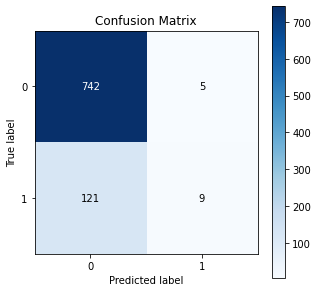

In [36]:
# Visualize the confusion matrix
splt.plot_confusion_matrix(Y_test, Y_pred,figsize=(5,5))
plt.show()

In [37]:
# Classification report
print(classification_report(Y_test, Y_pred));

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       747
           1       0.64      0.07      0.13       130

    accuracy                           0.86       877
   macro avg       0.75      0.53      0.52       877
weighted avg       0.83      0.86      0.80       877



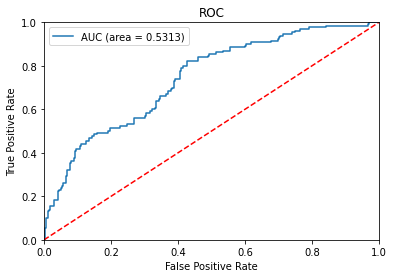

In [74]:
# Area Under Curve (AUC)
model_roc_auc = roc_auc_score(Y_test, model.predict(X_test))

# Plot
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.0]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend();

In [52]:
## Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model.coef_[0])):
    coefficients[X.columns[i]] = model.coef_[0][i]

# Add the intercept
coefficients['Intercept'] = model.intercept_[0]
coefficients

{'Age': -0.2973671260199565,
 'BusinessTravel': -0.008804307087983345,
 'Department': -0.14460444388665267,
 'DistanceFromHome': 0.017987162402208993,
 'Education': -0.057048992994832494,
 'EducationField': -0.09318144697171321,
 'Gender': 0.02524228570645906,
 'JobLevel': -0.030818781325359867,
 'JobRole': 0.0764882059957115,
 'MaritalStatus': 0.4358624980675554,
 'MonthlyIncome': -0.07779658224311603,
 'NumCompaniesWorked': 0.2788739648845272,
 'PercentSalaryHike': 0.061940756807449954,
 'StockOptionLevel': -0.06321421414181246,
 'TotalWorkingYears': -0.39404498186636194,
 'TrainingTimesLastYear': -0.1474509742540277,
 'YearsAtCompany': 0.06997491368368643,
 'YearsSinceLastPromotion': 0.394259325607342,
 'YearsWithCurrManager': -0.4851606882712858,
 'Intercept': -1.8930105909393866}

In [53]:
# Coefficients as DataFrame
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe.T

,0
Age,-0.297367
BusinessTravel,-0.008804
Department,-0.144604
DistanceFromHome,0.017987
Education,-0.057049
EducationField,-0.093181
Gender,0.025242
JobLevel,-0.030819
JobRole,0.076488
MaritalStatus,0.435862


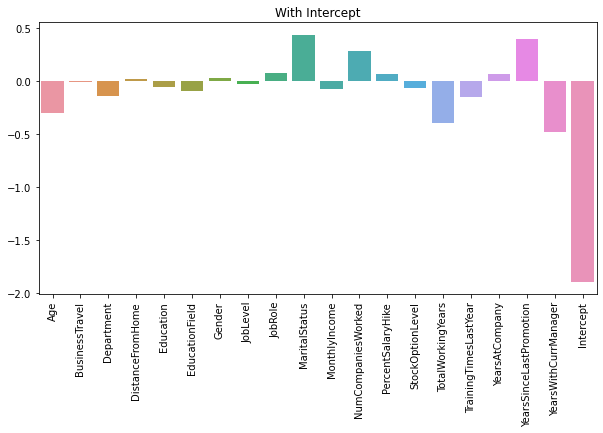

In [54]:
# Plot of the coefficients
plt.figure(figsize=(10, 5))
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');
plt.xticks(rotation=90);

### **4.2.** Reduced-set of features

In [56]:
# Normalization of the features
Scaler_X2 = StandardScaler()
X2_train  = Scaler_X2.fit_transform(X2_train)
X2_test   = Scaler_X2.transform(X2_test)

# Fit the logistic regression model
model2 = LogisticRegression()
model2.fit(X2_train, Y_train)

# Make the prediction on the test
Y_pred = model2.predict(X2_test)

# Print accuracy and confusion matrix
print('Accuracy on the test set: %.2f' % accuracy_score(Y_test, Y_pred))
print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))

Accuracy on the test set: 0.85
Confusion matrix:
 [[747   0]
 [130   0]]


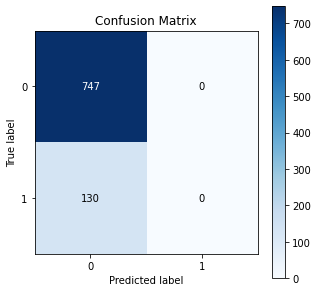

In [57]:
# Visualize the confusion matrix
splt.plot_confusion_matrix(Y_test, Y_pred,figsize=(5,5))
plt.show()

In [61]:
# Classification report
print(classification_report(Y_test, Y_pred, zero_division=True));

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       747
           1       1.00      0.00      0.00       130

    accuracy                           0.85       877
   macro avg       0.93      0.50      0.46       877
weighted avg       0.87      0.85      0.78       877



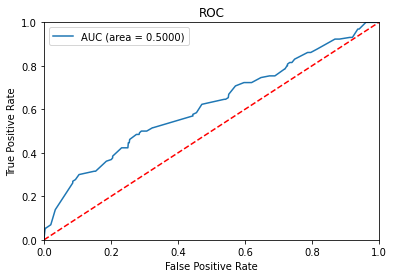

In [63]:
# Area Under Curve (AUC)
model_roc_auc = roc_auc_score(Y_test, model2.predict(X2_test))

# Plot
fpr, tpr, thresholds = roc_curve(Y_test, model2.predict_proba(X2_test)[:,1])
plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.0]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend();

In [68]:
## Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model2.coef_[0])):
    coefficients[X2.columns[i]] = model2.coef_[0][i]

# Add the intercept
coefficients['Intercept'] = model2.intercept_[0]
coefficients

{'BusinessTravel': -0.004737109370054165,
 'Department': -0.11937997121464804,
 'EducationField': -0.10215895255528519,
 'MaritalStatus': 0.46907590861077103,
 'Intercept': -1.7117429398903727}

In [71]:
# Coefficients as DataFrame
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe

,BusinessTravel,Department,EducationField,MaritalStatus,Intercept
0,-0.004737,-0.11938,-0.102159,0.469076,-1.711743


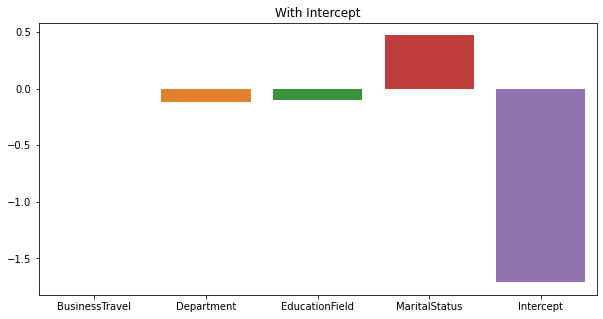

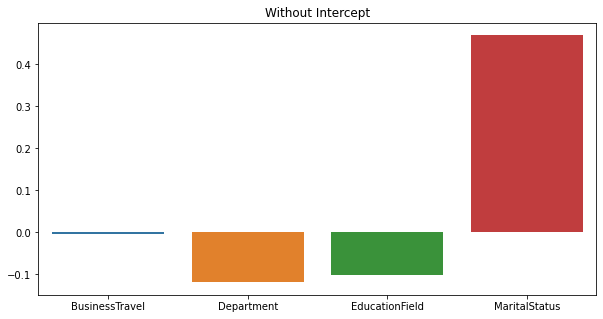

In [72]:
# Plot of the coefficients - with intercept
plt.figure(figsize=(10, 5))
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');

# Plot of the coefficients - without intercept
plt.figure(figsize=(10, 5))
sns.barplot(data = coefficients_dataframe[['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']]);
plt.title('Without Intercept');